# Setup

* Python version : Python 2.7.10
* Data file : wine_data.csv. This file should be in the same directory as the code.

# Reading data

In [1]:
%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('wine_data.csv')

In [2]:
# View data sample
df.ix[1:5]

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# Plots

### Alcohol vs Hue

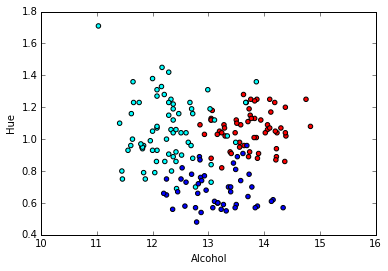

In [3]:
cmap = matplotlib.colors.ListedColormap(["red","cyan","blue"])
s = plt.scatter(df.ix[:, 1], df.ix[:, 11],  c=df.ix[:, 0], cmap=cmap)
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.show()

From the plot above, we can see that there isn't any significant linear relationship between the hue and alcohol content. However, a strategy like kNN might be useful for classification using only hue and alcohol since we can see distinct clusters, but with a slight overlap.

### N choose 2 graphs

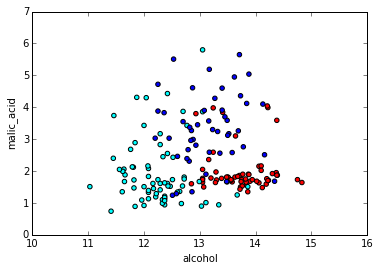

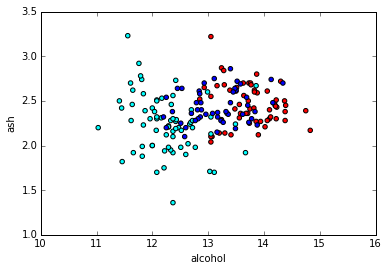

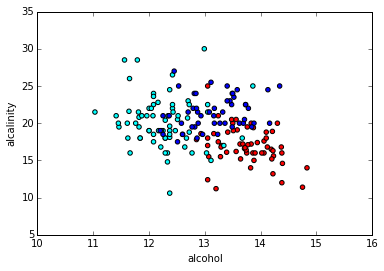

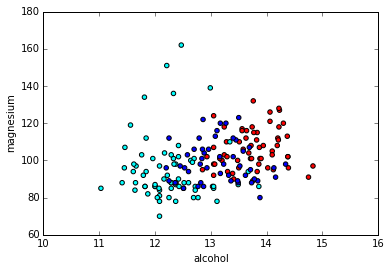

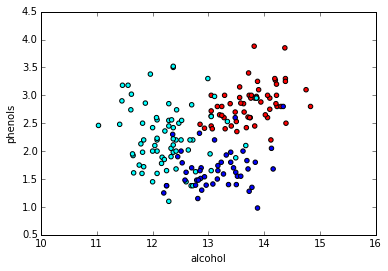

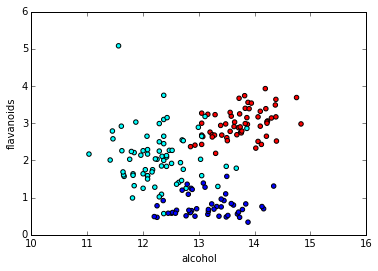

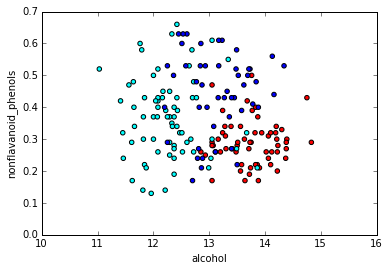

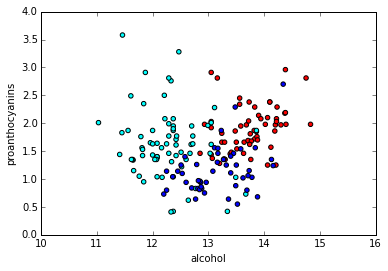

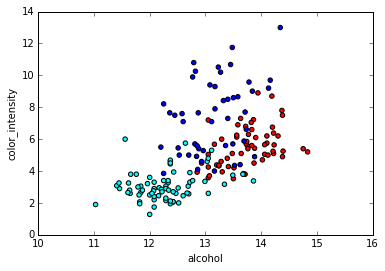

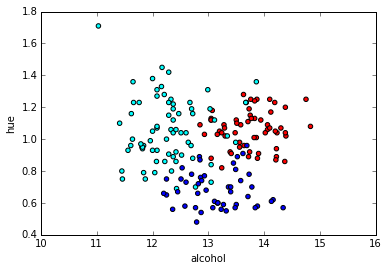

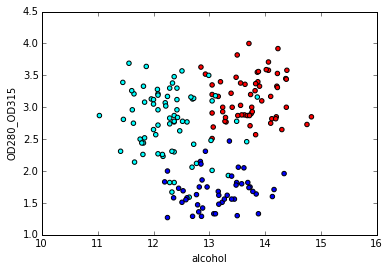

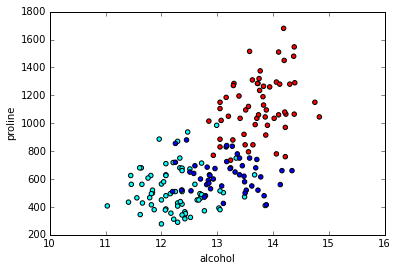

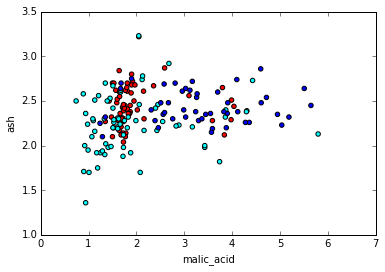

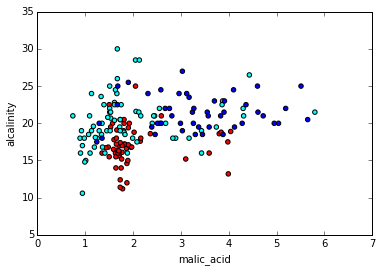

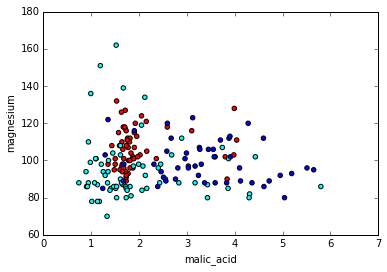

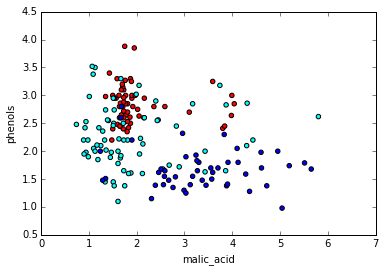

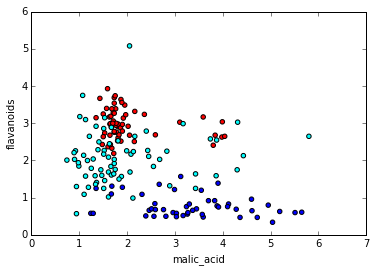

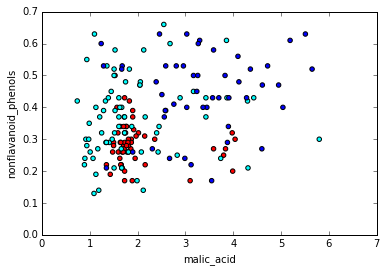

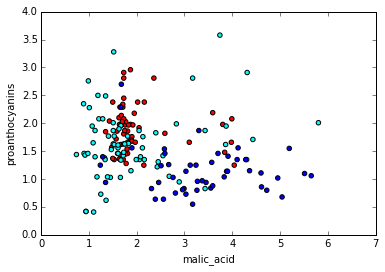

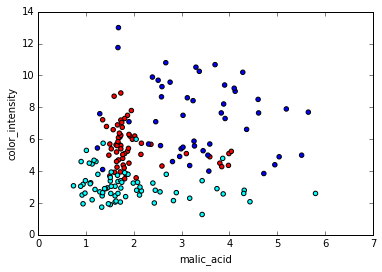

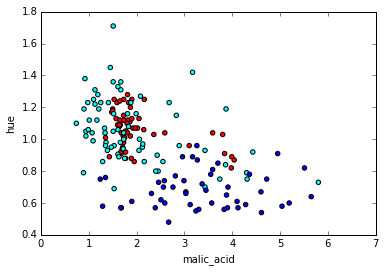

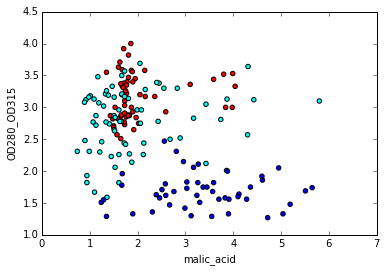

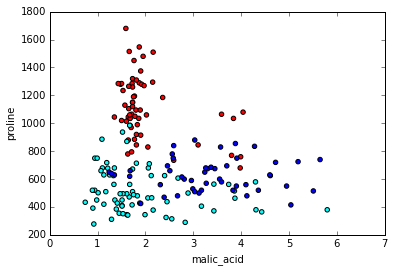

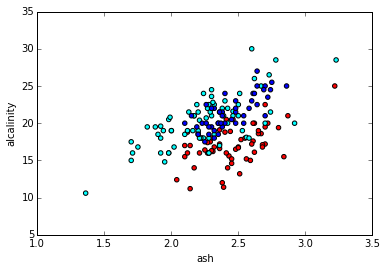

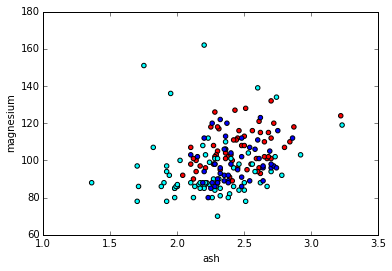

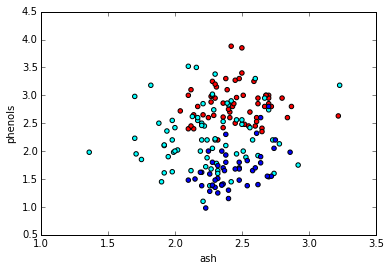

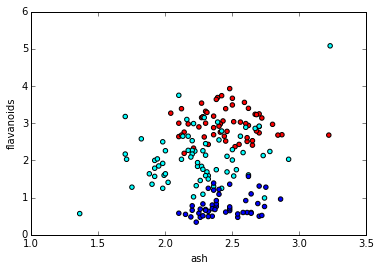

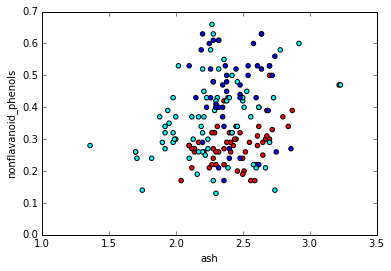

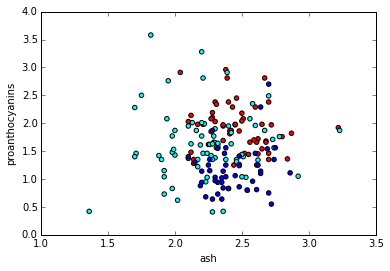

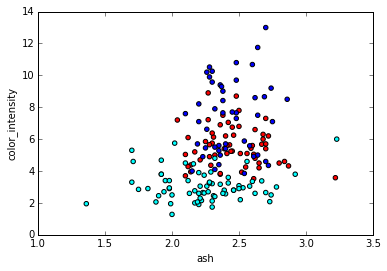

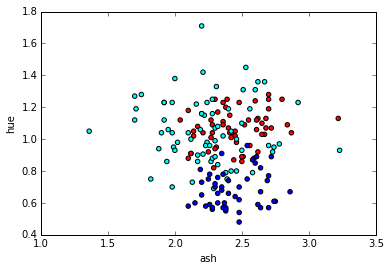

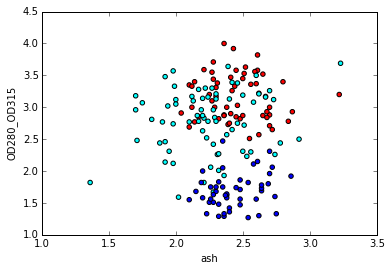

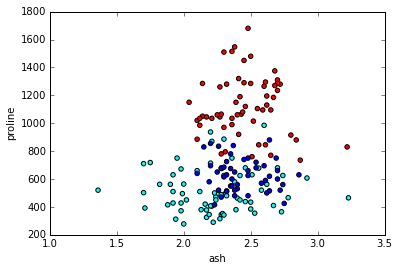

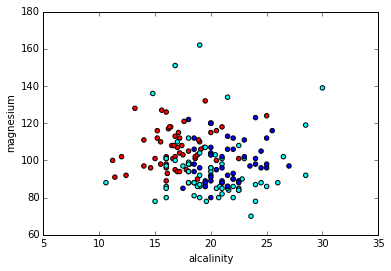

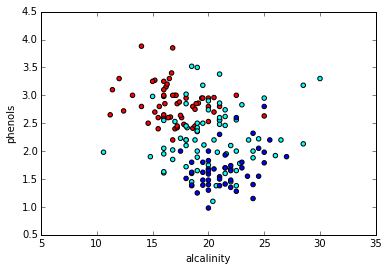

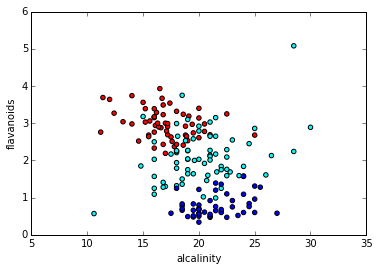

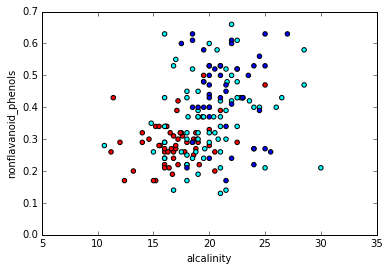

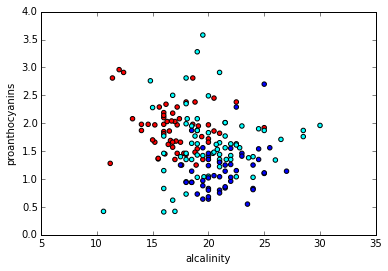

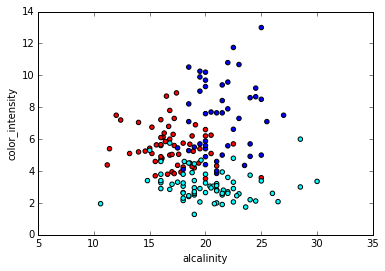

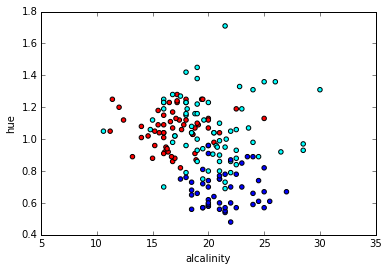

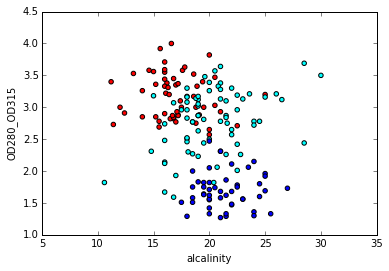

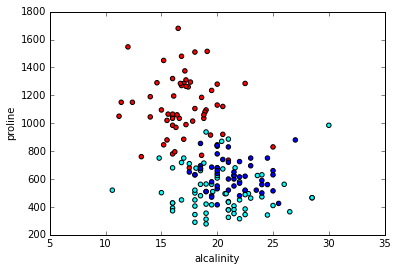

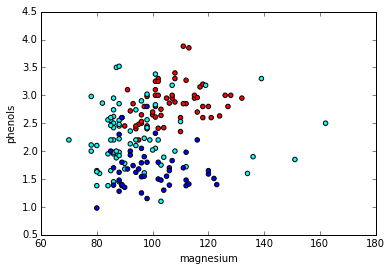

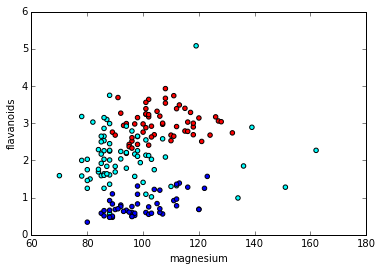

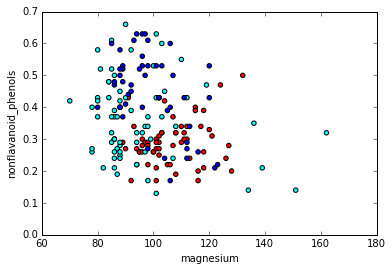

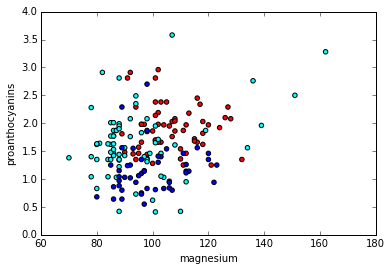

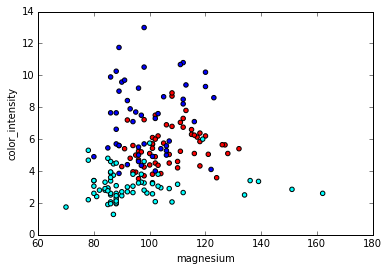

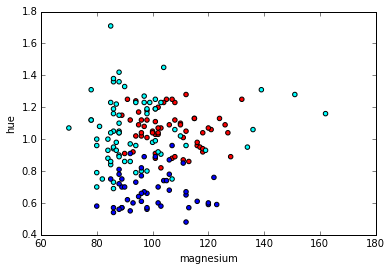

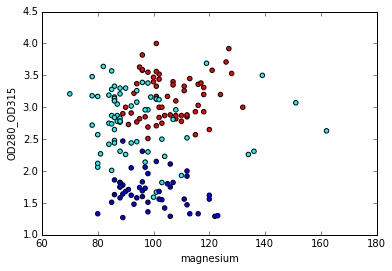

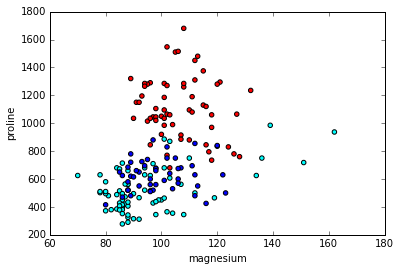

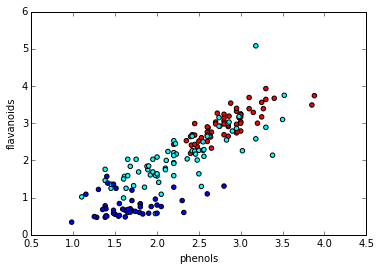

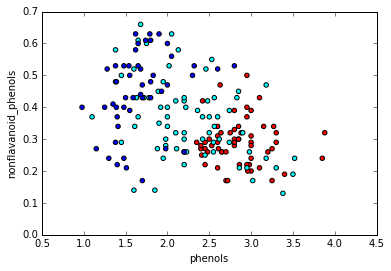

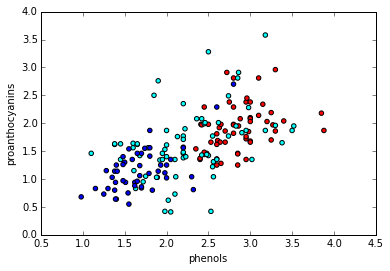

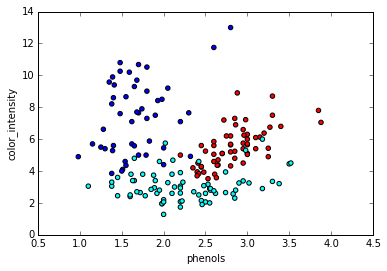

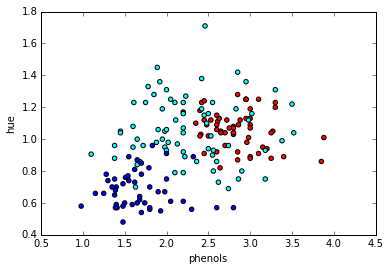

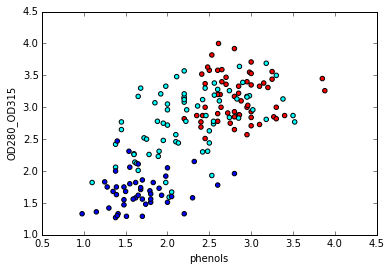

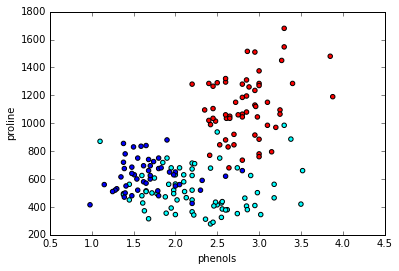

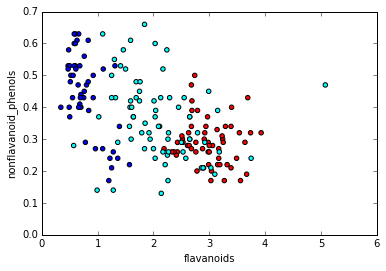

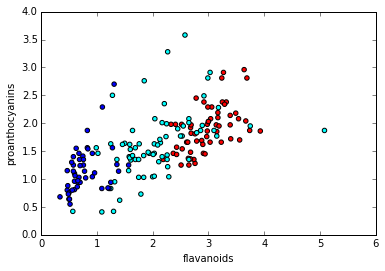

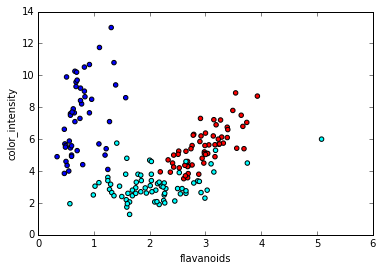

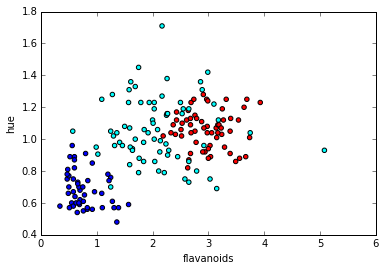

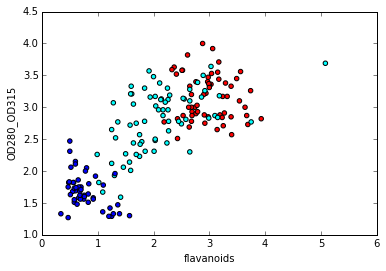

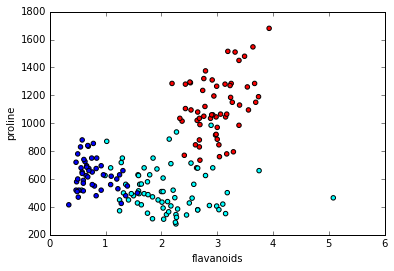

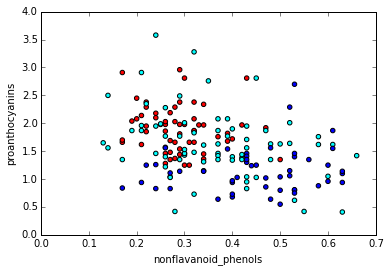

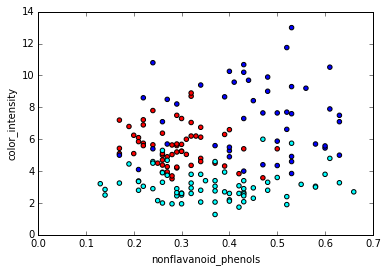

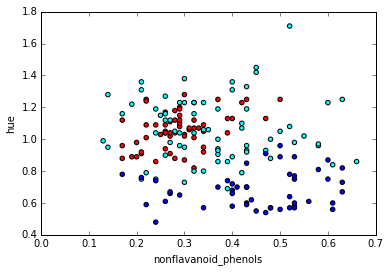

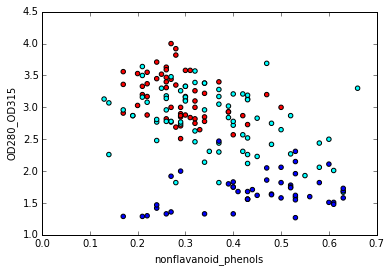

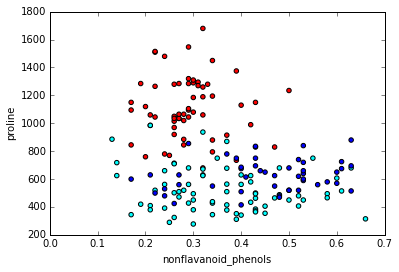

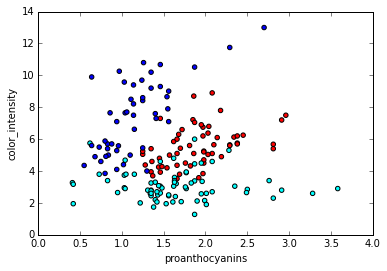

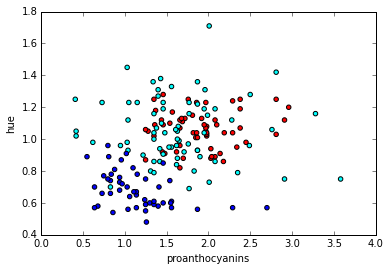

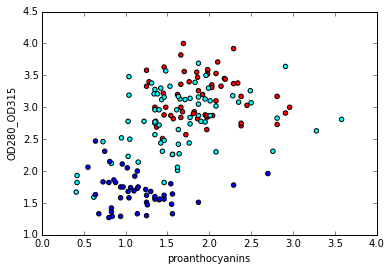

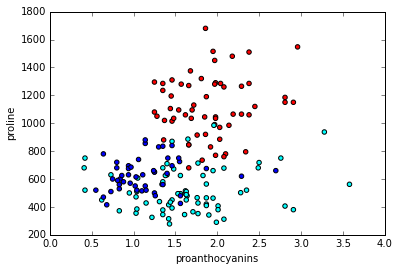

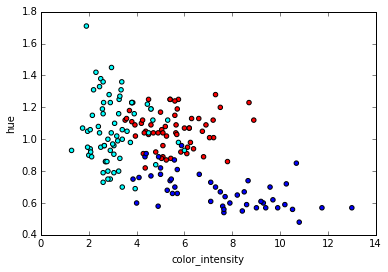

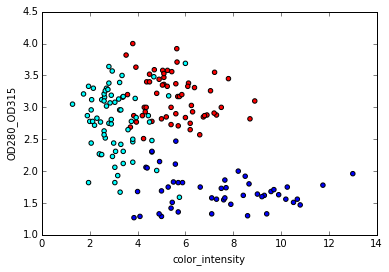

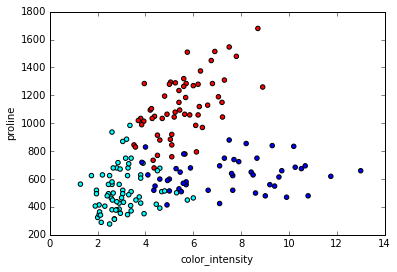

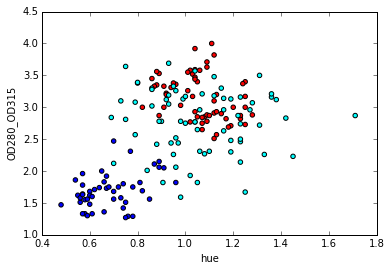

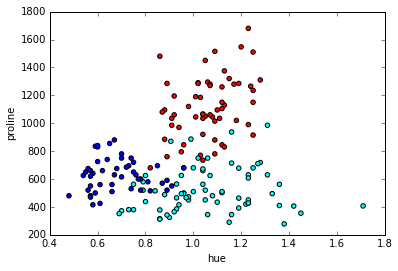

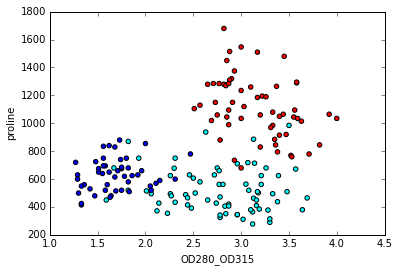

In [28]:
cmap = matplotlib.colors.ListedColormap(["red","cyan","blue"])
for i in range(1, 13):
    for j in range(i+1, 14):
        s = plt.scatter(df.ix[:, i], df.ix[:, j],  c=df.ix[:, 0], cmap=cmap)
        plt.xlabel(df.columns.values[i])
        plt.ylabel(df.columns.values[j])
        plt.show()

* The flavanoids vs alcohol grpah is giving a good separation amongst the categories.
* Also, we can see a linear relationship between total phenols and flavanoids (although not sufficient for class separation). This should motivate us to use PCA for dimentionality reduction.

#### Look for linear separation using a single feature

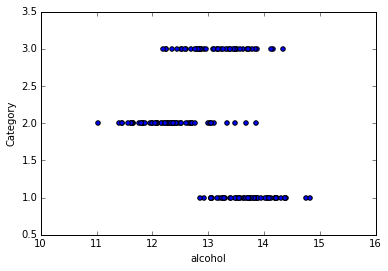

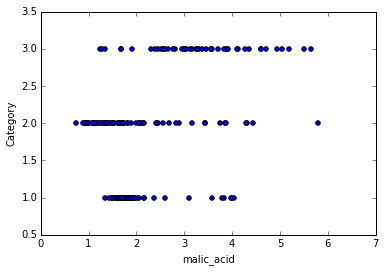

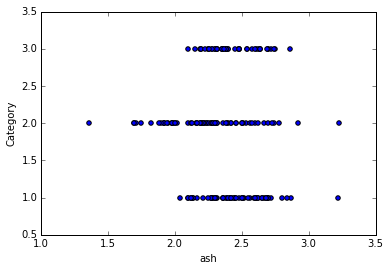

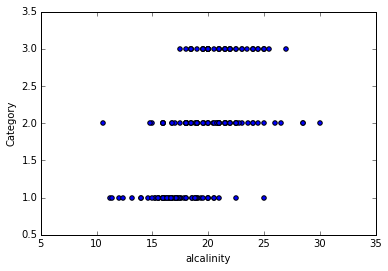

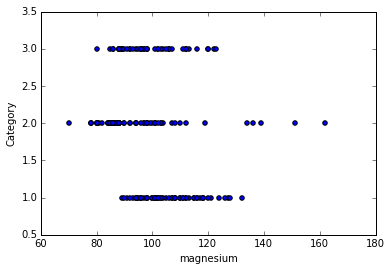

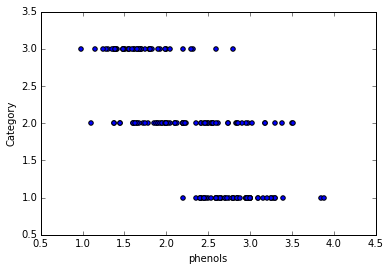

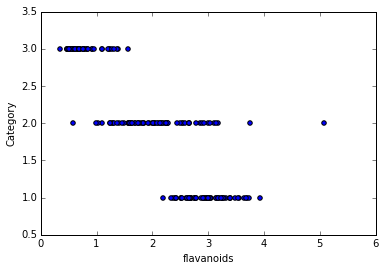

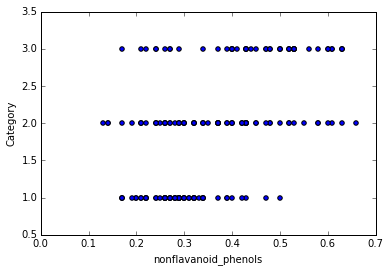

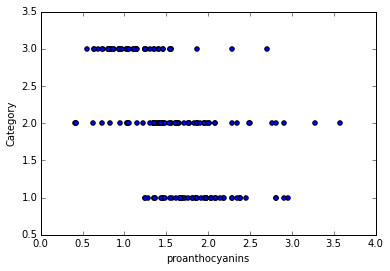

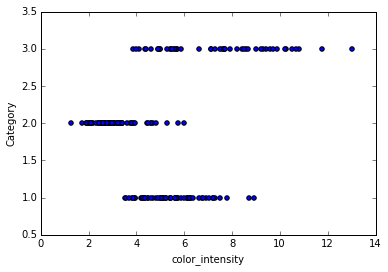

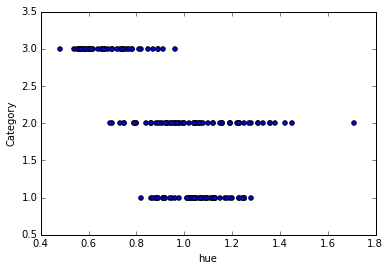

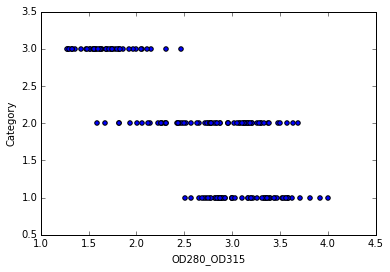

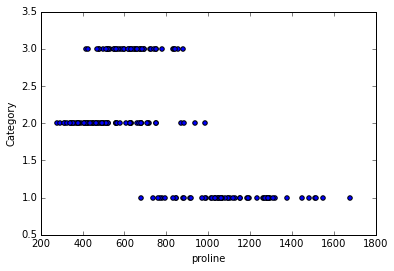

In [23]:
for i in range(1, 14):
    s = plt.scatter(df.ix[:, i], df.ix[:, 0], cmap=cmap)
    plt.xlabel(df.columns.values[i])
    plt.ylabel('Category')
    plt.show()

* With this simple experiment, it is clear that just using a linear separator on a single feature would not help. 
* However, very low and very high proline levels are suggestive of representing a particular category as can be seen from the graph.

## Checking if PCA would help

In [11]:
df_norm = (df.ix[:, 1:] - df.ix[:, 1:].mean()) / (df.ix[:, 1:].max() - df.ix[:, 1:].min())
cov_mat = df_norm.cov()

In [6]:
print np.linalg.eigvals(cov_mat)
print np.diagonal(cov_mat)

[ 0.2200922   0.10246084  0.04624247  0.04011226  0.03005877  0.02516286
  0.01978926  0.00440241  0.0074605   0.00687688  0.01301012  0.01228411
  0.01215769]
[ 0.04564144  0.04874375  0.02152324  0.02963303  0.02410082  0.04657426
  0.044407    0.05513932  0.03260005  0.0391272   0.03453299  0.06763628
  0.05045102]


It looks like applying PCA would be helpful given the difference in diagonal entries of current covariance matrix and the eigenvalues (the correlations after PCA). 

In [72]:
from IPython.display import HTML

HTML('''
<script>
code_show=false; 
function code_toggle() {
    if (code_show){
        $('div.input').show();
    } else {
        $('div.input').hide();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>''')